In [1]:
import csv, sqlite3, matplotlib
import pandas as pd
from pandas import DataFrame, Series
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('co-est2019-alldata.csv')
data2 = pd.read_csv('COVID-19_Historical_Data_Table.csv')

In [3]:
dict1 = defaultdict(int)

dict2 = {}
dict3 = {}
FIPS = None
for i in range(len(data1)):
    if data1["STNAME"][i] == "Wisconsin":
        FIPS = (2-len(str(data1["STATE"][i])))* "0" + str(data1["STATE"][i]) + (3-len(str(data1["COUNTY"][i])))* "0" + str(data1["COUNTY"][i])
        
        dict2[data1["CTYNAME"][i]] = FIPS
        dict3[data1["CTYNAME"][i]] = data1["POPESTIMATE2019"][i]
        

dict4 = {}
county = None
list1 = []
for i in range(len(data2)):
    if data2["NEGATIVE"][i] == "NaN":
        data2["NEGATIVE"][i] = 0
    if data2["POSITIVE"][i] == "NaN":
        data2["POSITIVE"][i] = 0
    if data2["GEO"][i] == "County":
        county = data2["NAME"][i] + " " + data2["GEO"][i]
    if data2["GEO"][i] == "State":
        county = "Wisconsin"
    fraction_positive = data2["POSITIVE"][i]/(data2["NEGATIVE"][i] + data2["POSITIVE"][i])
    
    dict4 = {"Date": data2["LoadDttm"][i][:10], "FIPS": dict2[county] , "county": county, "population": dict3[county], "fraction of positive tests": fraction_positive}
    list1.append(dict4)
    
df = DataFrame(list1)

a = df.pivot(index = "county", columns = "Date", values = "fraction of positive tests")

list1 = []
for i in range(len(df)):
    list2 = []
    list2.append(df["FIPS"][i])
    list2.append(df["county"][i])
    list2.append(df["population"][i])
    list1.append(list2)
    
b = DataFrame(list1)
b = b[:73]
b["FIPS"] = b[0]
b.pop(0)
b["county"] = b[1]
b = b.set_index(1)
b["population"] = b[2]
b.pop(2)

result = pd.concat([b, a], axis = 1, sort = False)
r = result.reset_index()
r.pop("index")
r = r.sort_values("population", ascending = True)
r = r.reset_index()
r.pop("index")
r.head()

,FIPS,county,population,2020/03/15,2020/03/16,2020/03/17,2020/03/18,2020/03/19,2020/03/20,2020/03/21,...,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,2020/05/08,2020/05/09,2020/05/10,2020/05/11,2020/05/12
0,55037,Florence County,4295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.076923,0.074074,0.071429,0.064516,0.064516,0.064516,0.062500,0.058824,0.057143,0.055556
1,55078,Menominee County,4556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.013158,0.012821,0.012500,0.011494,0.021739,0.019231,0.017699,0.017391,0.017391,0.016000
2,55051,Iron County,5687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.045455,0.045455,0.042553,0.040816,0.040000,0.037736,0.036364,0.033333,0.032258,0.032258
3,55091,Pepin County,7287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,55041,Forest County,9004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.010526,0.009709,0.009346,0.009091,0.018072,0.020619,0.019704


In [4]:
dict1 = defaultdict(int)

dict2 = {}
dict3 = {}
FIPS = None
for i in range(len(data1)):
    if data1["STNAME"][i] == "Wisconsin":
        FIPS = (2-len(str(data1["STATE"][i])))* "0" + str(data1["STATE"][i]) + (3-len(str(data1["COUNTY"][i])))* "0" + str(data1["COUNTY"][i])
        
        dict2[data1["CTYNAME"][i]] = FIPS
        dict3[data1["CTYNAME"][i]] = data1["POPESTIMATE2019"][i]
        


dict4 = {}
county = None
list1 = []
for i in range(len(data2)):
    if data2["NEGATIVE"][i] == "NaN":
        data2["NEGATIVE"][i] = 0
    if data2["POSITIVE"][i] == "NaN":
        data2["POSITIVE"][i] = 0
    if data2["GEO"][i] == "County":
        county = data2["NAME"][i] + " " + data2["GEO"][i]
    if data2["GEO"][i] == "State":
        county = "Wisconsin"
    tests_per_count = (data2["NEGATIVE"][i] + data2["POSITIVE"][i])/dict3[county]
    
    dict4 = {"Date": data2["LoadDttm"][i][:10], "FIPS": dict2[county] , "county": county, "population": dict3[county], "tests per capita": tests_per_count}
    list1.append(dict4)

df = DataFrame(list1)

a = df.pivot(index = "county", columns = "Date", values = "tests per capita")

list1 = []
for i in range(len(df)):
    list2 = []
    list2.append(df["FIPS"][i])
    list2.append(df["county"][i])
    list2.append(df["population"][i])
    list1.append(list2)
    
b = DataFrame(list1)
b = b[:73]
b["FIPS"] = b[0]
b.pop(0)
b["county"] = b[1]
b = b.set_index(1)
b["population"] = b[2]
b.pop(2)

result1 = pd.concat([b, a], axis = 1, sort = False)
res = result1.reset_index()
res.pop("index")
res = res.sort_values("population", ascending = True)
res = res.reset_index()
res.pop("index")
res.head()

,FIPS,county,population,2020/03/15,2020/03/16,2020/03/17,2020/03/18,2020/03/19,2020/03/20,2020/03/21,...,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,2020/05/08,2020/05/09,2020/05/10,2020/05/11,2020/05/12
0,55037,Florence County,4295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006054,0.006286,0.006519,0.007218,0.007218,0.007218,0.007451,0.007916,0.008149,0.008382
1,55078,Menominee County,4556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.016681,0.017120,0.017559,0.019096,0.020193,0.022827,0.024802,0.025241,0.025241,0.027436
2,55051,Iron County,5687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007737,0.007737,0.008264,0.008616,0.008792,0.009320,0.009671,0.010550,0.010902,0.010902
3,55091,Pepin County,7287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.017017,0.022094,0.022231,0.025250,0.025662,0.032386,0.033759,0.034719,0.035954,0.037190
4,55041,Forest County,9004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.009107,0.009551,0.009551,0.010551,0.011439,0.011884,0.012217,0.018436,0.021546,0.022546


In [5]:
%matplotlib inline
matplotlib.rcParams["font.size"] = 12

Text(0, 0.5, 'fraction of positive tests')

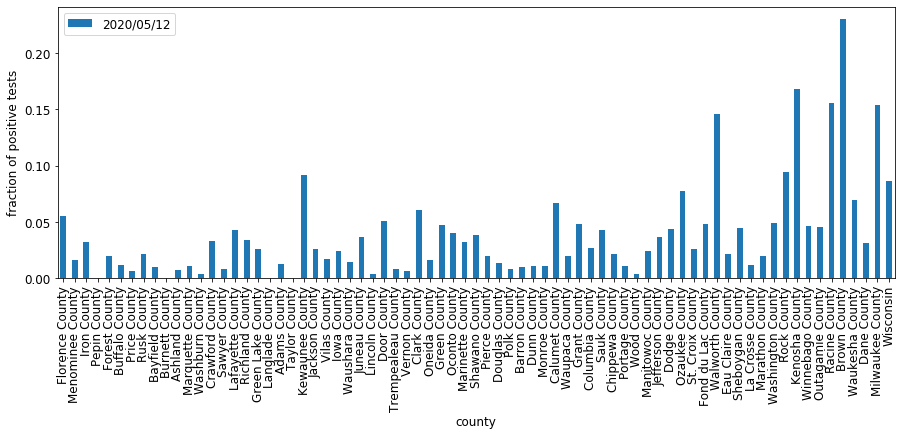

In [6]:
# fraction of positive tests for all counties on 2020/05/12
# graph is sorted by population in ascending order

a = r[["county","2020/05/12"]].plot(x="county", kind="bar",figsize=(15,5))
a.set_ylabel("fraction of positive tests")

In [7]:
from matplotlib import rcParams, cycler
import numpy as np


N = 18
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))

r1 = r.drop(72)

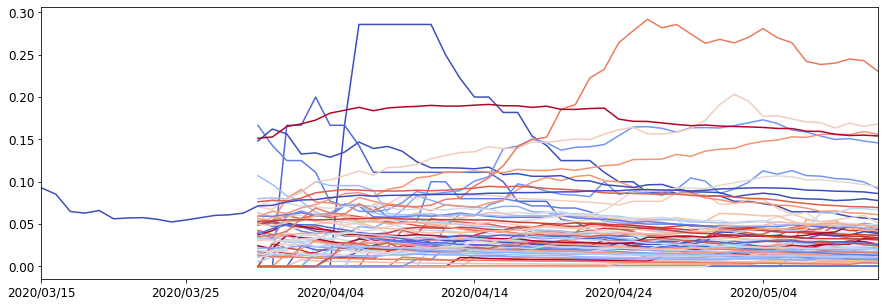

In [8]:
# fraction of postive cases for all counties

for i in range(len(r)):
    r.loc[i][3:].plot(figsize = (15,5))

In [9]:
# Next Few graphs are the fraction of positive cases, where the counties are divided into four 
# groups--quartiles of the population distribution and plot, with all four plots having the 
# same y-axis scale.

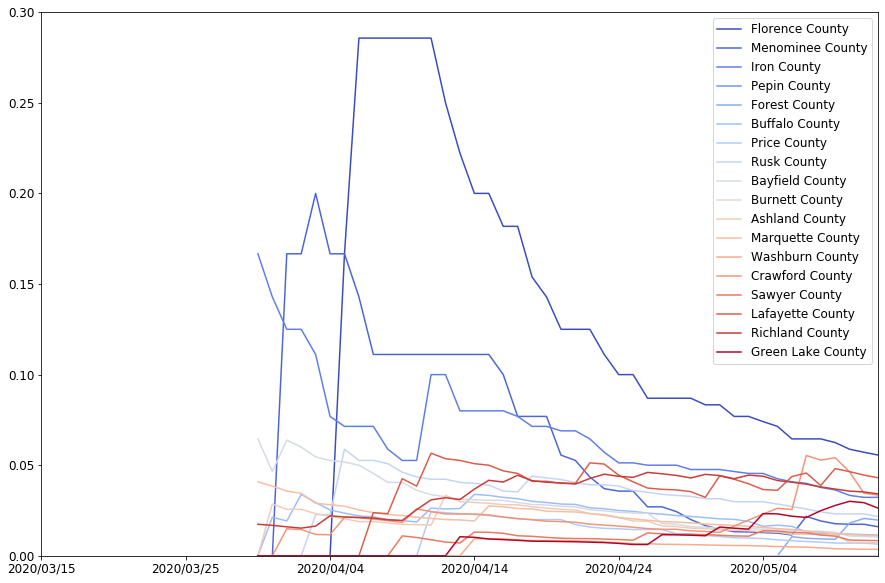

In [10]:
# 1st quartile of population

for i in range(0, int(len(r)/4)):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15, 10), ylim = (0,0.30), legend = True) 
    

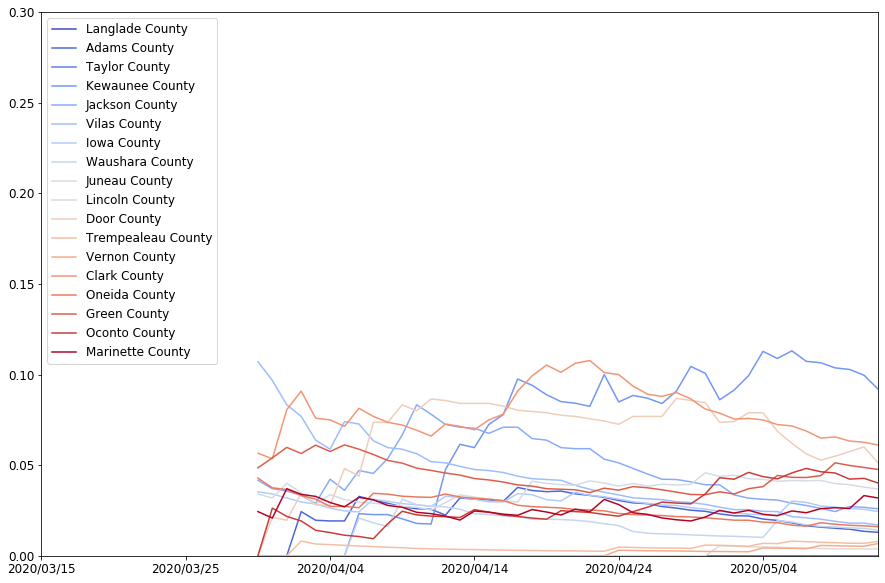

In [11]:
# 2nd quartile of population

for i in range(int(len(r)/4), int(len(r)/2)):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)

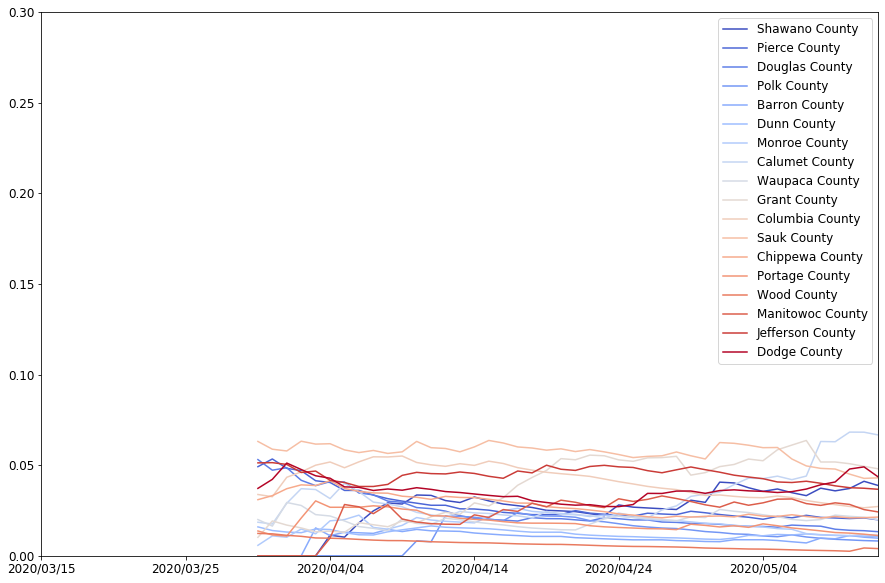

In [12]:
# 3rd quartile of population

for i in range(int(len(r)/2),int(3*len(r)/4)):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)

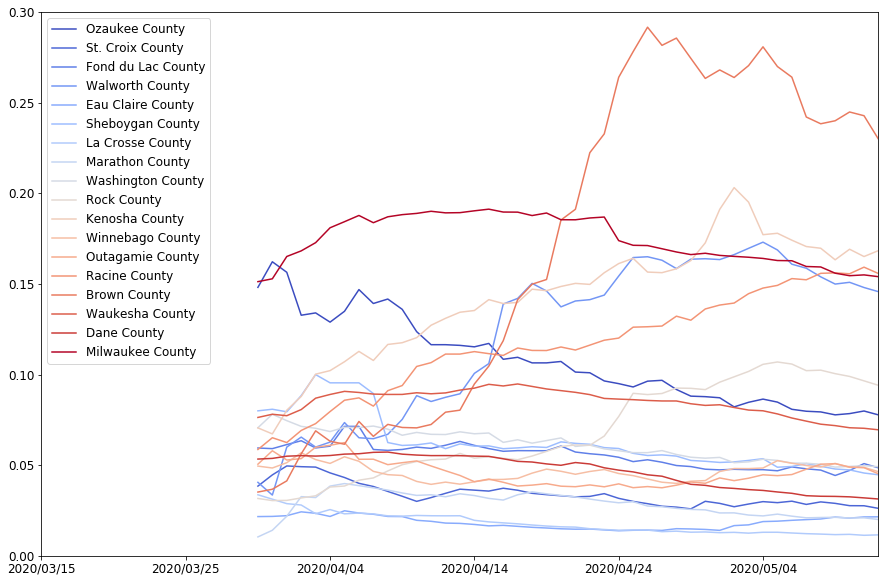

In [13]:
# 4th quartile of population

for i in range(int(3*len(r)/4),int(len(r))-1):
    result.loc[r.loc[i][1]][3:].plot(figsize = (15,10), ylim = (0,0.30), legend = True)
    


In [14]:
# first date = 2020/04/15; Second date = 2020/05/12 
# x value positive rate on the first date and y value positive rate on the second date
# The points are colored by population and sized by testing per capita
# Size of the "x" is testing on first date, and size of the circle is testing on the second date

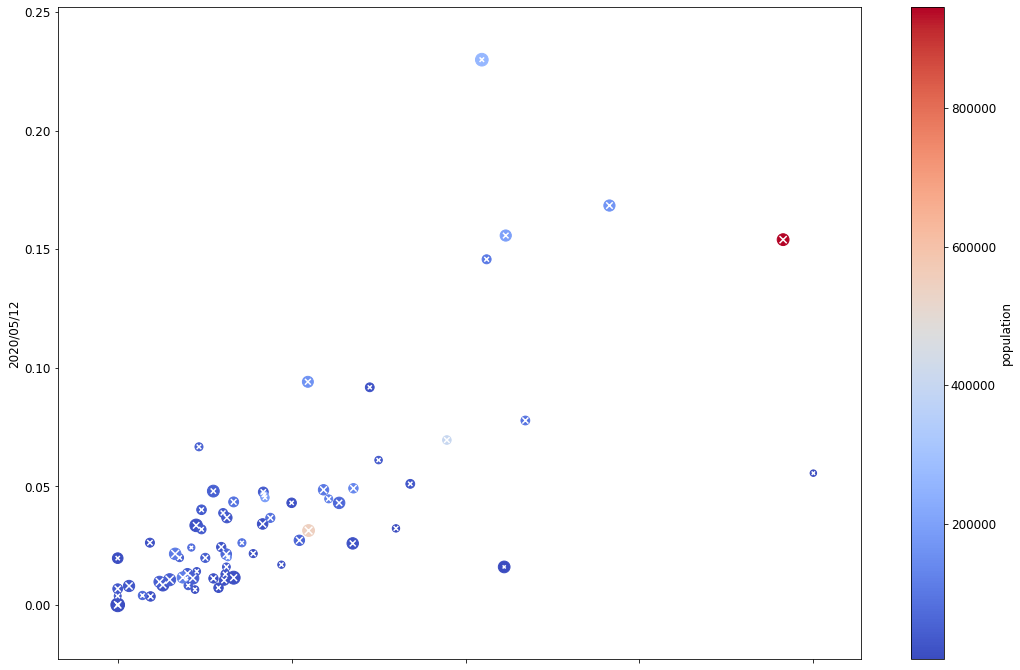

In [15]:
ax = r1.plot.scatter(x = "2020/04/15", y = "2020/05/12", s= res["2020/05/12"]*5000, c = "population", colormap = "coolwarm", figsize = (18,12))
r1.plot.scatter(x = "2020/04/15", y = "2020/05/12", s= res["2020/04/15"]*5000, c = "white", figsize = (18,12), ax =ax, marker = "x")

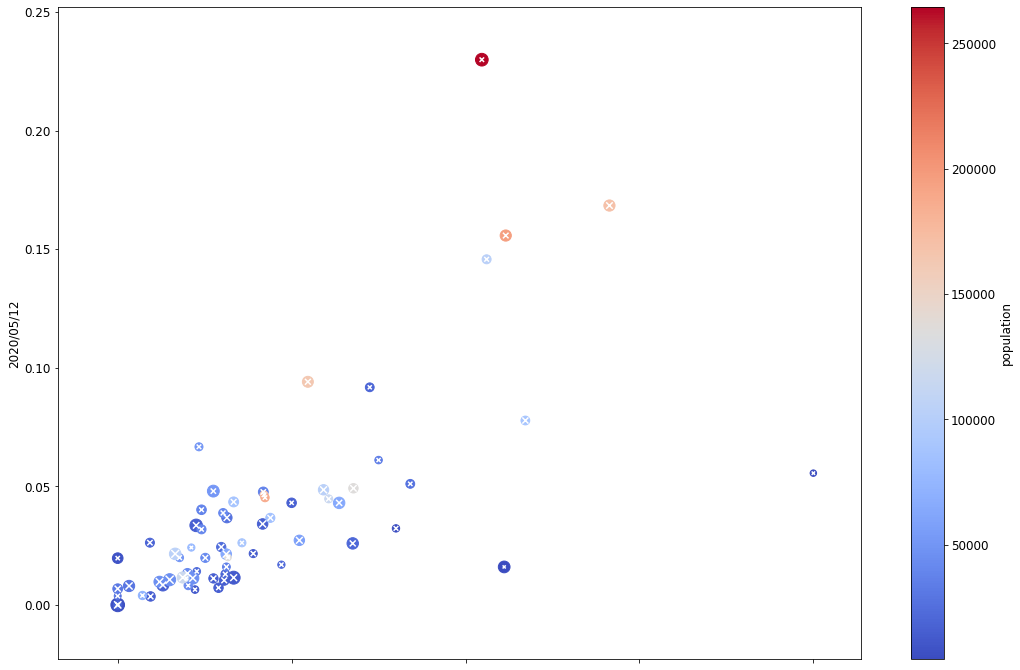

In [16]:
# remove outliers
# when population <= 400000

r2 = []
r3 = []
for i in range(len(r1)):
    if r1["population"][i] <=400000:
        r2.append(r1.iloc[i])
        r3.append(res.iloc[i])
        

r2 = DataFrame(r2)
r3 = DataFrame(r3)
#r2.plot.scatter(x = "2020/04/15", y = "2020/05/12",  c = "population", colormap = "coolwarm", figsize = (10,7))
ax = r2.plot.scatter(x = "2020/04/15", y = "2020/05/12", s= r3["2020/05/12"]*5000, c = "population", colormap = "coolwarm", figsize = (18,12))
r2.plot.scatter(x = "2020/04/15", y = "2020/05/12", s= r3["2020/04/15"]*5000, c = "white", figsize = (18,12), ax =ax, marker = "x")

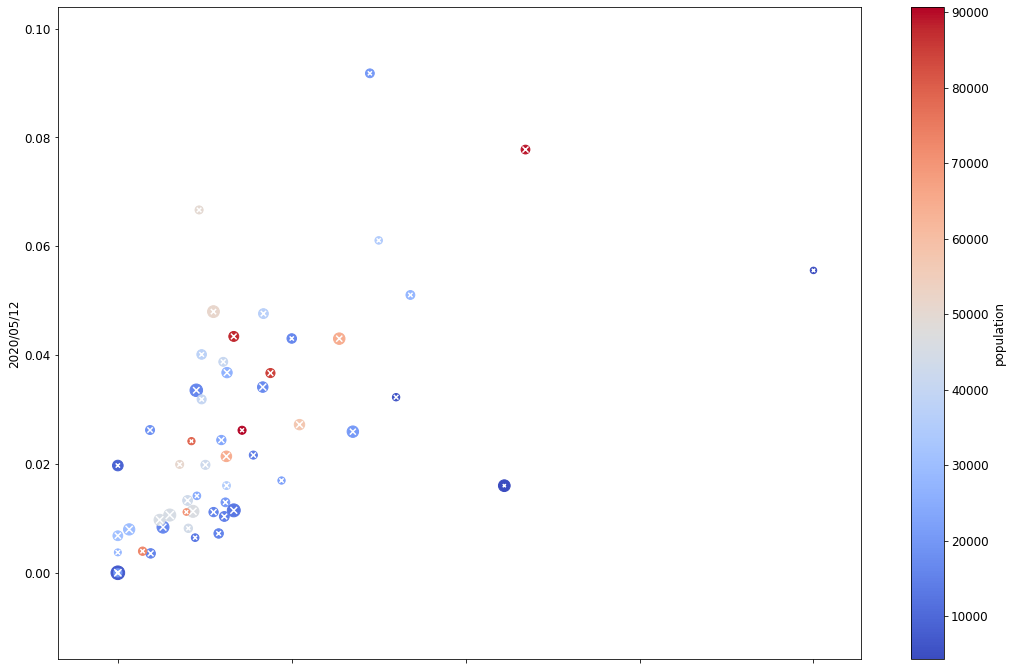

In [17]:
# remove outliers
# when population <= 100000

r2 = []
r3 = []
for i in range(len(r1)):
    if r1["population"][i] <= 100000:
        r2.append(r1.iloc[i])
        r3.append(res.iloc[i])

r2 = DataFrame(r2)
r3 = DataFrame(r3)
ax = r2.plot.scatter(x = "2020/04/15", y = "2020/05/12", s= r3["2020/05/12"]*5000, c = "population", colormap = "coolwarm", figsize = (18,12))
r2.plot.scatter(x = "2020/04/15", y = "2020/05/12", s= r3["2020/04/15"]*5000, c = "white", figsize = (18,12), ax =ax, marker = "x")

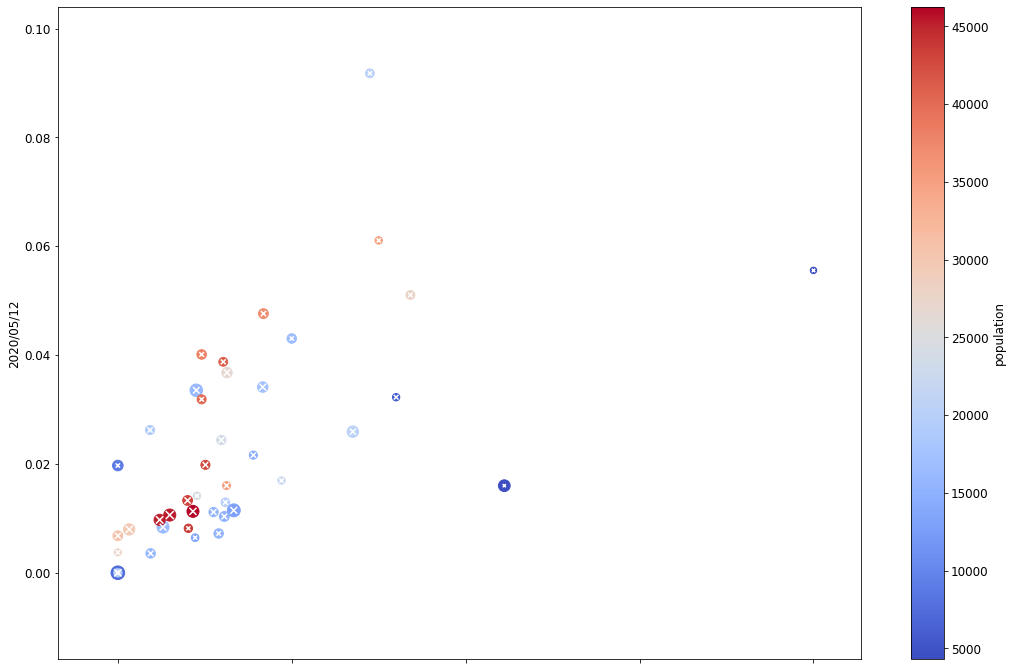

In [18]:
# remove outliers
# when population <= 50000

r2 = []
r3 = []
for i in range(len(r1)):
    if r1["population"][i] <= 50000:
        r2.append(r1.iloc[i])
        r3.append(res.iloc[i])
        

r2 = DataFrame(r2)
r3 = DataFrame(r3)
ax = r2.plot.scatter(x = "2020/04/15", y = "2020/05/12", s= r3["2020/05/12"]*5000, c = "population", colormap = "coolwarm", figsize = (18,12))
r2.plot.scatter(x = "2020/04/15", y = "2020/05/12", s= r3["2020/04/15"]*5000, c = "white", figsize = (18,12), ax =ax, marker = "x")

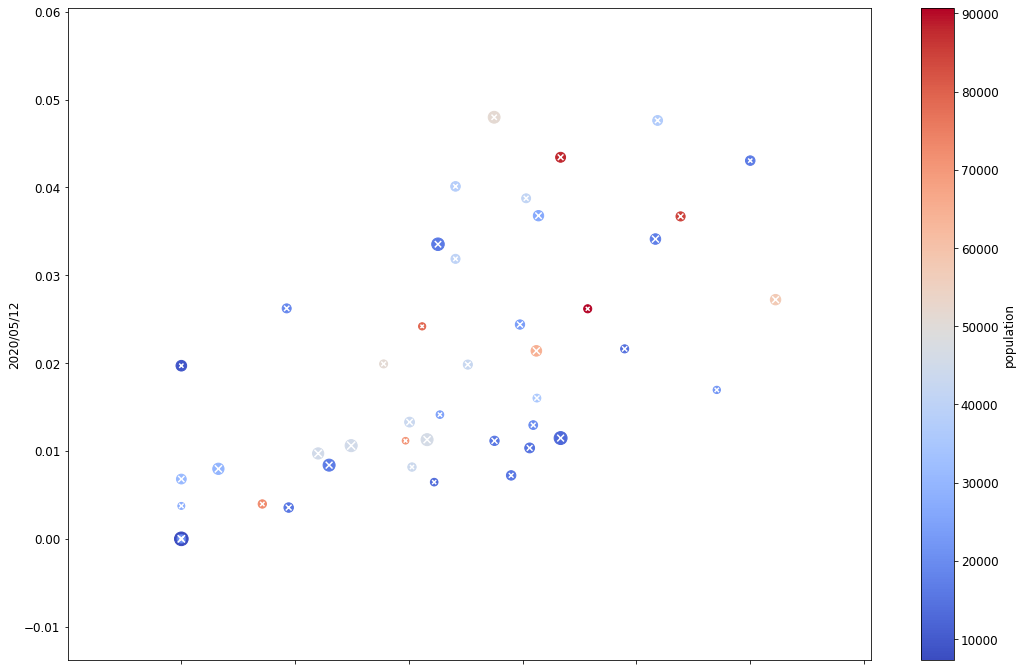

In [19]:
# remove outliers
# when population <= 100000
# when fraction psotive rate on first date <= 0.06
# when fraction psotive rate on Second date <= 0.06



r3 = []
r4 = []
for i in range(len(r1)):
    if r1["2020/04/15"][i] <= 0.06 and r1["2020/05/12"][i] <= 0.06 and r1["population"][i] <=100000:
        r3.append(r1.iloc[i])
        r4.append(res.iloc[i])

r3 = DataFrame(r3)
r4 = DataFrame(r4)
ax = r3.plot.scatter(x = "2020/04/15", y = "2020/05/12", s= r4["2020/05/12"]*5000, c = "population", colormap = "coolwarm", figsize = (18,12))
r3.plot.scatter(x = "2020/04/15", y = "2020/05/12", s= r4["2020/04/15"]*5000, c = "white", figsize = (18,12), ax =ax, marker = "x")

In [20]:
# Next 2 graphs show data from the counties data but are ordered accoring to population. I have also attached 
# a fraction positive data graph next to the counties data to compare properly.

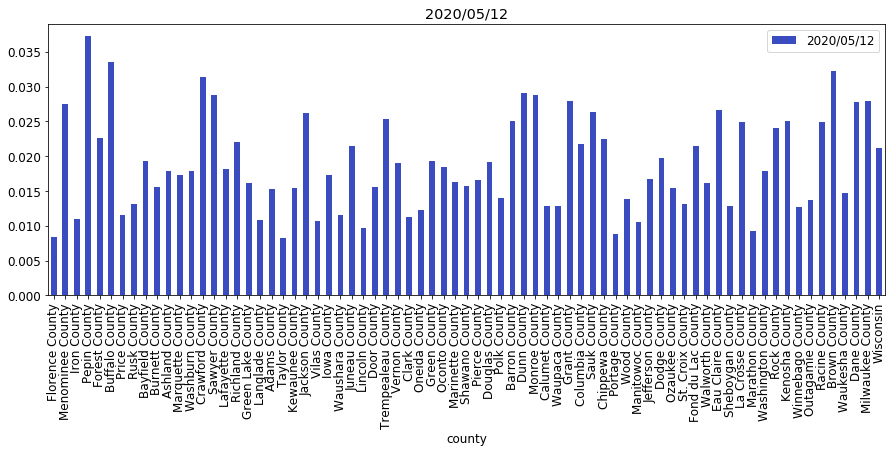

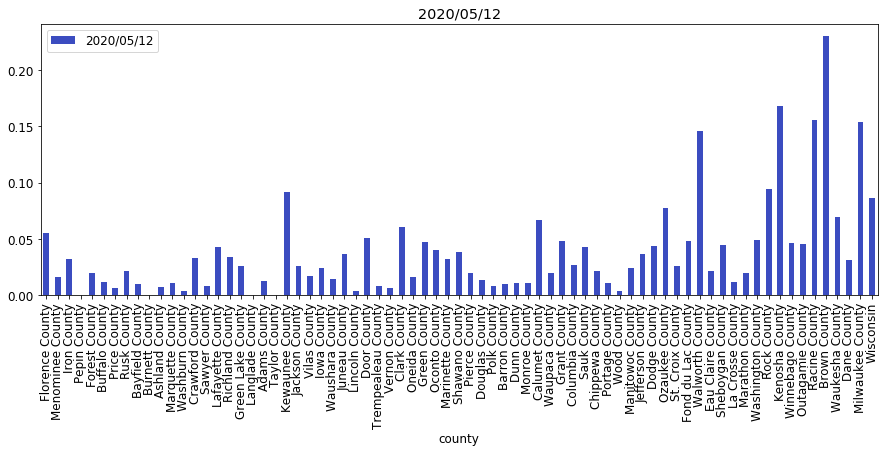

In [21]:
# The following 2 subplots are ordered by population
# Graph Above = tests per capita
# Graph Below = fraction of postive rates

# tests per capita of all counties for a single date orered by population (in this case 2020/05/12)
a = res[["county","2020/05/12"]].plot(x="county", kind="bar",figsize=(15,5), subplots =True)


# fraction of positive tests for all counties on 2020/05/12
# graph is sorted by population in ascending order

b = r[["county","2020/05/12"]].plot(x="county", kind="bar",figsize=(15,5), subplots =True)

Text(0, 0.5, 'tests per capita')

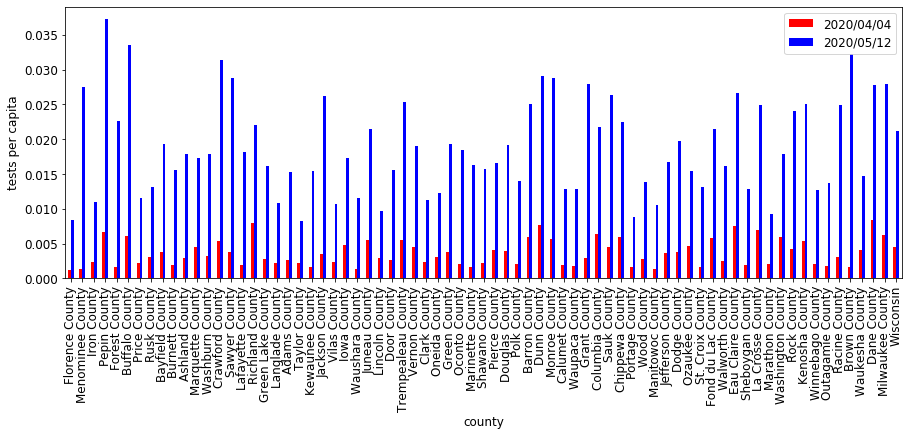

In [22]:
# tests per capita of all counties comparing that of two dates ordered by population

a = res[["county","2020/04/04","2020/05/12"]].plot(x="county", kind="bar",figsize=(15,5), color = ("red","blue"))
a.set_ylabel("tests per capita")